In [81]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from sklearn.preprocessing import MinMaxScaler

# Server Stats Data Processing

In [140]:
# Import cpu load dataset
cpu_df = pd.read_csv("data/Log Report.csv", encoding='utf-8')

# Rename columns to remove spaces and symbols
cpu_df.rename(columns={'Collection Time': 'Date', 'CPU (%)': 'CPU', 'Memory (%)': 'Memory', 'Disk Used (%)': 'Disk_Used'}, inplace=True)

# Remove unneeded columns
cpu_df.drop(['Disk_Used', 'Reason', 'Status', 'Memory'], axis=1, inplace=True)

# Strip our timezone as we don't need it
cpu_df['Date'] = cpu_df['Date'].str.replace('PDT|PST', '', regex=True)

# convert date to datetime
cpu_df['Date'] = pd.to_datetime(cpu_df['Date'])

# Set date to index
cpu_df = cpu_df.set_index('Date')
cpu_df.head()

,CPU
Date,
2022-05-11 23:59:34,7.00
2022-05-11 23:58:32,7.13
2022-05-11 23:57:32,7.00
2022-05-11 23:56:32,6.63
2022-05-11 23:55:32,7.00


# Sales Data Processing

### SQL Query for sales data
```
DECLARE @day DATETIME = '2022-05-03'

SELECT dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0) Date, COUNT(*) Sales
FROM dbo.TerminalSales
WHERE SaleDate BETWEEN @day AND DATEADD(DAY,1,@day)
AND SaleType = 0
GROUP BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
ORDER BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
```

In [141]:
# Import sales data
sales_df = pd.read_csv("data/sales.csv", encoding='utf-8')

# convert date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Set date as index
sales_df.set_index("Date",inplace=True)
sales_df.head()

,Sales
Date,
2022-04-26 07:25:00,1
2022-04-26 08:36:00,2
2022-04-26 08:39:00,1
2022-04-26 08:54:00,1
2022-04-26 09:08:00,1


# Scaling

In [142]:
# Create new dataframes for scaling
scaled_cpu_df = cpu_df
scaled_sales_df = sales_df

# Scale our dataframes to make the view more friendly
scaler = MinMaxScaler()
scaled_cpu_df['CPU'] = scaler.fit_transform(scaled_cpu_df['CPU'].values.reshape(-1,1))
scaled_sales_df['Sales'] = scaler.fit_transform(scaled_sales_df['Sales'].values.reshape(-1,1))

In [143]:
from matplotlib import style
import seaborn as sns
style.use('seaborn-dark')
sns.set_context("paper")

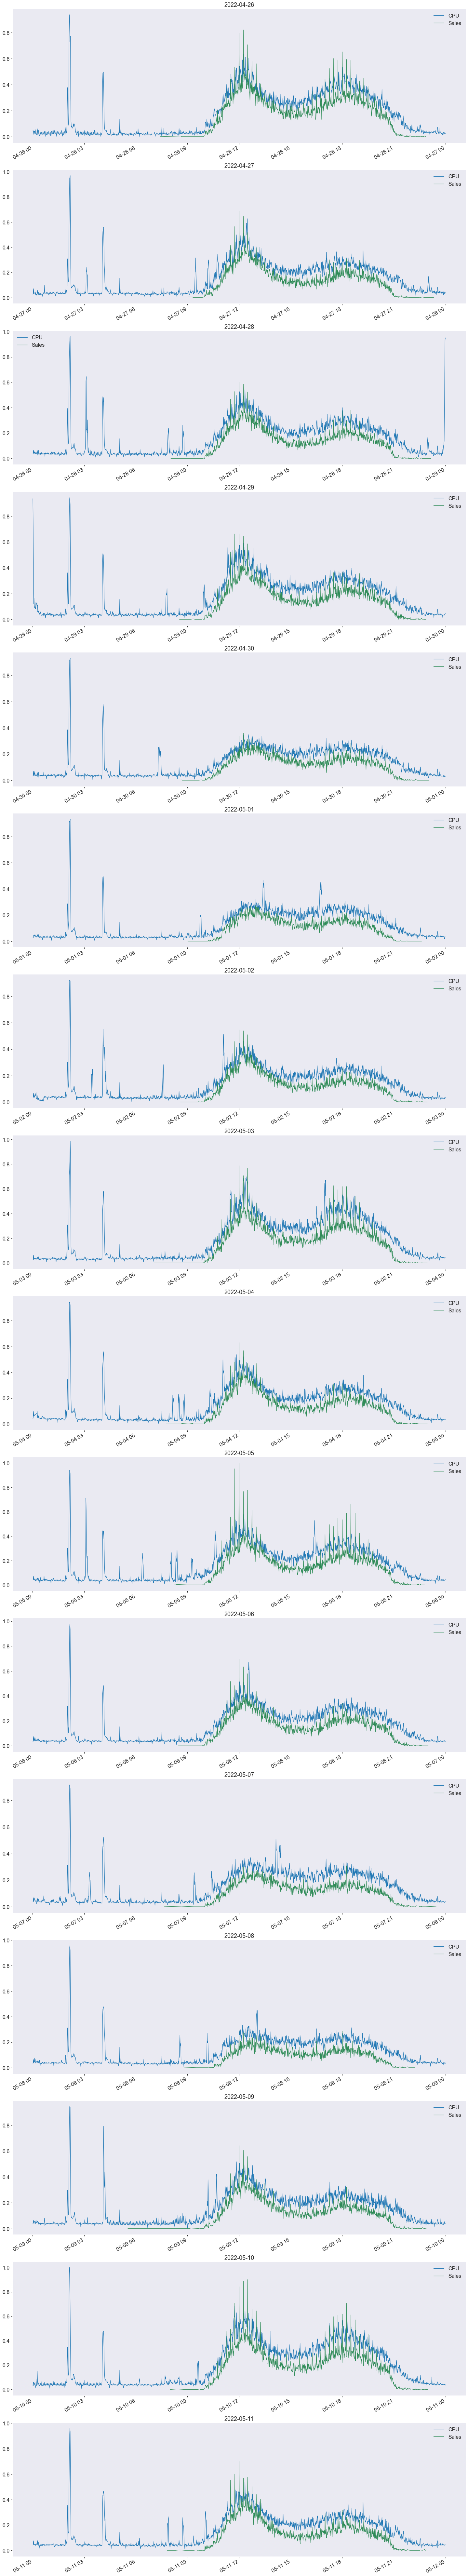

In [144]:
fig, axes = plt.subplots(nrows=len(unique_days), ncols=1)

row = 0
for day in unique_days:
    ax = scaled_cpu_df.loc[day].plot(ax=axes[row], figsize=(25,160), color='tab:blue', fontsize=16)
    ax = scaled_sales_df.loc[day].plot(ax=axes[row], color='seagreen')
    ax.set_xlabel('')
    ax.legend(fontsize=16)
    ax.set_title(f'{day}', fontsize=18)
    row += 1

plt.savefig('images/days.png')
plt.show()